# Milestone 1: Data Collection, Exploration and Processing.

**Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Collection**

In [2]:

# Load the dataset
df = pd.read_csv('Tractor-Sales.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
df.describe()

,Number of Tractor Sold
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [4]:
# Convert 'Month-Year' to datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b-%y')

# Sort values by date
df = df.sort_values('Month-Year')

# Rename columns
df.rename(columns={'Month-Year': 'Date', 'Number of Tractor Sold': 'Tractor_Sales'}, inplace=True)


**Handling Nulls**

In [5]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values if present
if missing_values.any():
    df.fillna(method='mean', inplace=True)  # Forward fill missing values


Missing Values:
 Date             0
Tractor_Sales    0
dtype: int64


**Cliping Outliers**

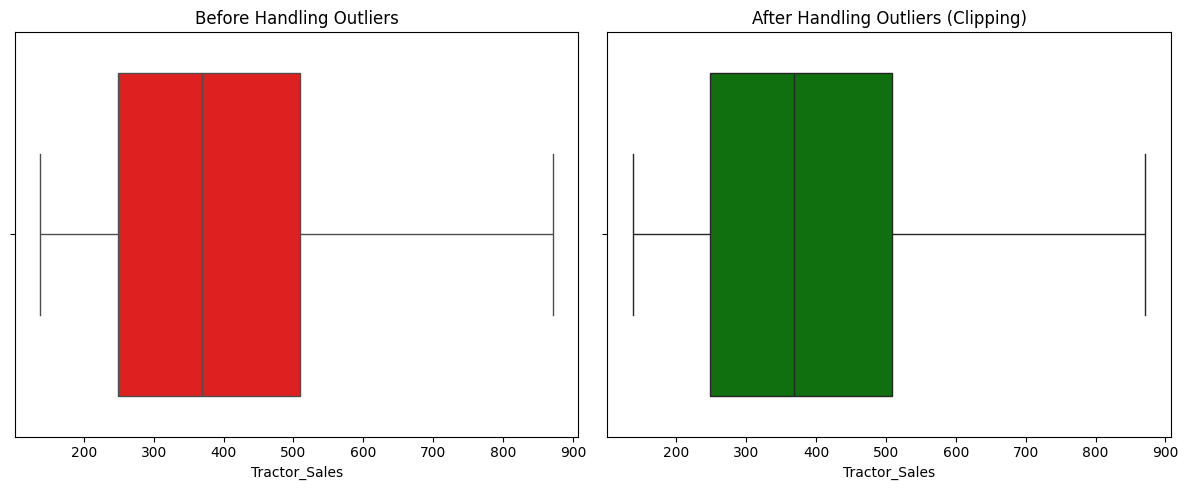

In [6]:
plt.figure(figsize=(12, 5))
# Detect Outliers using IQR
Q1 = df['Tractor_Sales'].quantile(0.25)
Q3 = df['Tractor_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Before Handling Outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Tractor_Sales"], color="red")
plt.title("Before Handling Outliers")

# After Handling Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Tractor_Sales"].clip(lower=lower_bound, upper=upper_bound), color="green")
plt.title("After Handling Outliers (Clipping)")

plt.tight_layout()
plt.show()


**Skewness**

Skewness of Tractor Sales (before handling): 0.63
Right-skewed distribution


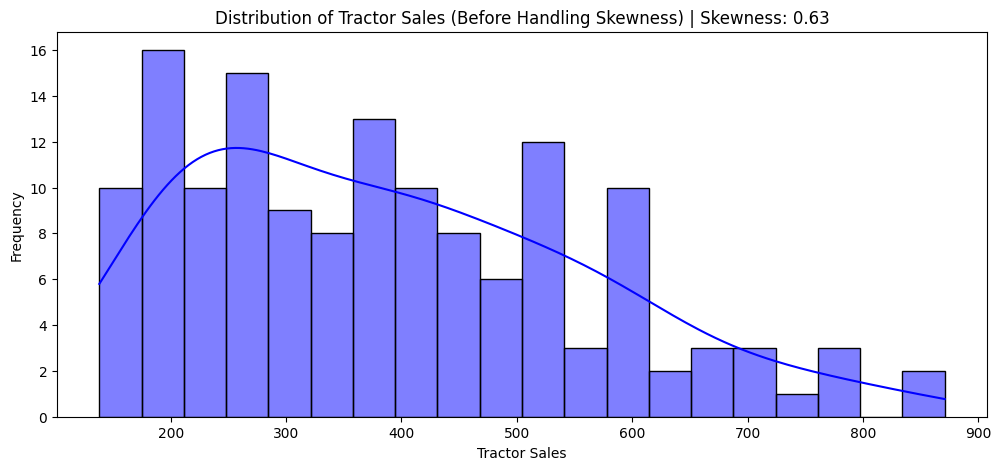

In [7]:
import scipy.stats as stats
from scipy.stats import skew

# Check skewness
sales_skewness = skew(df['Tractor_Sales'])
print(f"Skewness of Tractor Sales (before handling): {sales_skewness:.2f}")
if sales_skewness > 0.5:
    print("Right-skewed distribution")
elif sales_skewness < -0.5:
    print("Left-skewed distribution")
else:
    print("Approximately symmetrical distribution")
# Plot histogram and KDE before transformation
plt.figure(figsize=(12, 5))
sns.histplot(df['Tractor_Sales'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title(f"Distribution of Tractor Sales (Before Handling Skewness) | Skewness: {sales_skewness:.2f}")
plt.xlabel("Tractor Sales")
plt.ylabel("Frequency")
plt.show()




Skewness of Tractor Sales (after Log transformation): -0.11


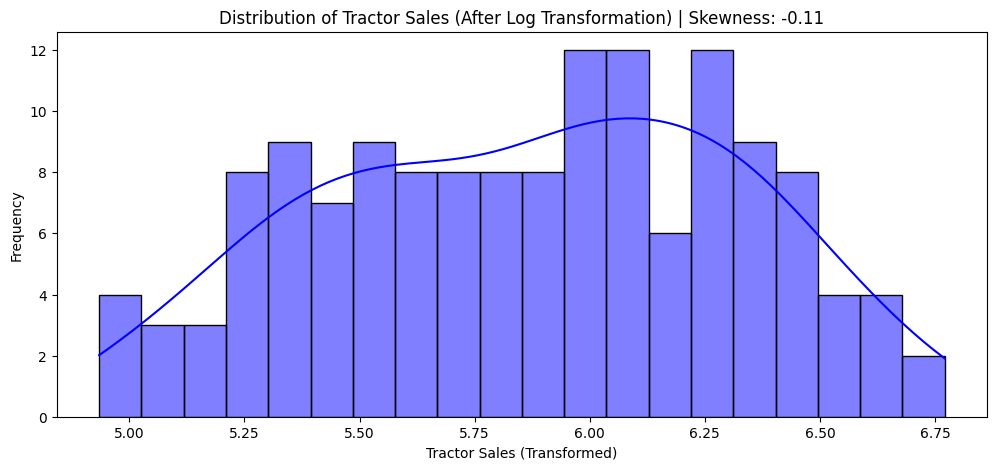

In [8]:
# Apply transformation
df['Tractor_Sales'] = np.log1p(df['Tractor_Sales'])  # Log transformation for right-skewed data
transformation = "Log"

# Check skewness again
sales_skewness_after = skew(df['Tractor_Sales'])
print(f"Skewness of Tractor Sales (after {transformation} transformation): {sales_skewness_after:.2f}")

# Plot histogram and KDE after transformation
plt.figure(figsize=(12, 5))
sns.histplot(df['Tractor_Sales'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title(f"Distribution of Tractor Sales (After {transformation} Transformation) | Skewness: {sales_skewness_after:.2f}")
plt.xlabel("Tractor Sales (Transformed)")
plt.ylabel("Frequency")
plt.show()


**EDA**

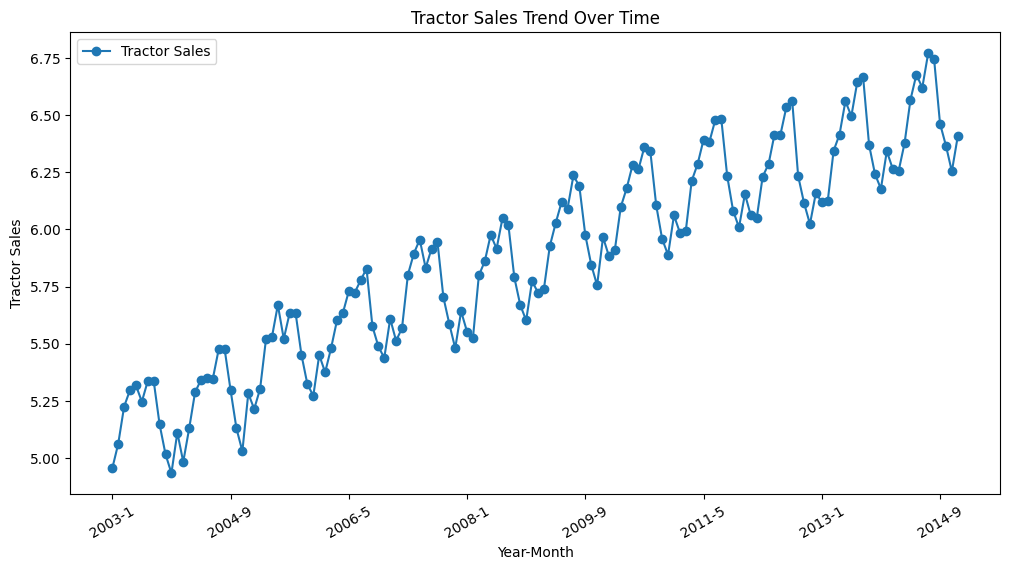

<ipython-input-9-53e7e7f8ffad>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Tractor_Sales'], palette="Blues")


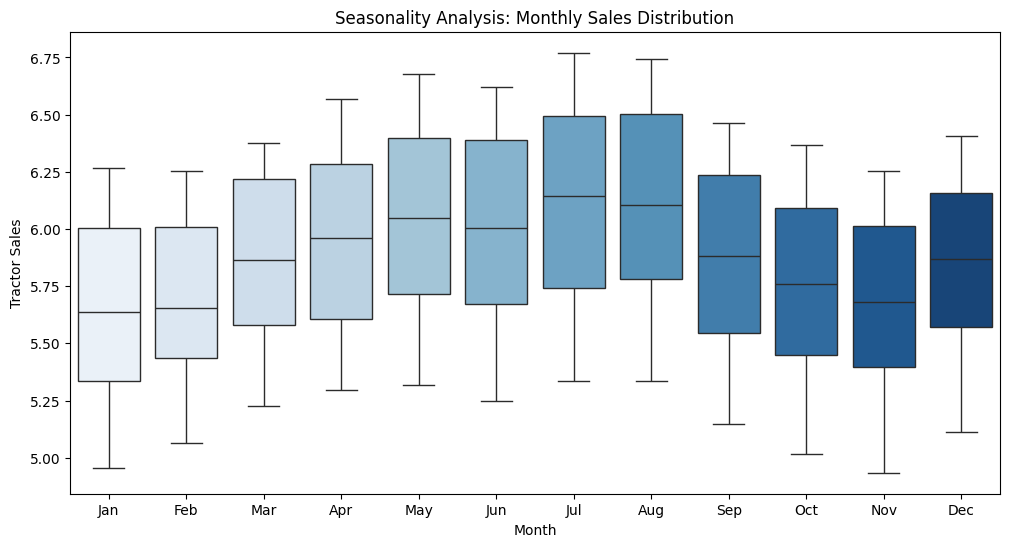

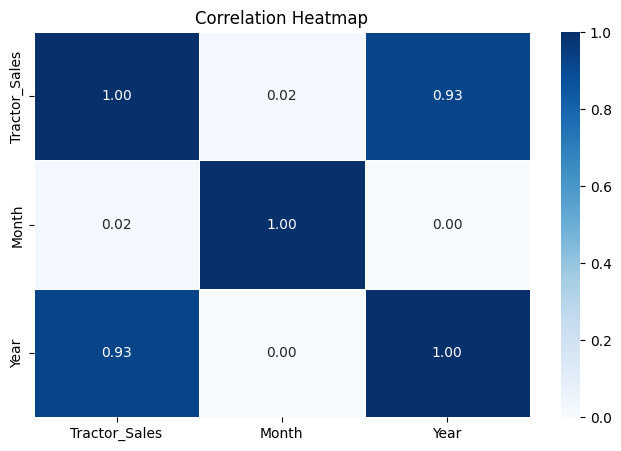

In [9]:

# Extract year and month for seasonality analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create additional time-based features
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
# Drop the original Date column
df_cleaned = df.drop(columns=['Date'])

# Save the cleaned dataset
df_cleaned.to_csv("Cleaned_Tractor_Sales.csv", index=False)

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['Tractor_Sales'], marker='o', label="Tractor Sales")
plt.xlabel("Year-Month")
plt.ylabel("Tractor Sales")
plt.title("Tractor Sales Trend Over Time")
plt.legend()
plt.xticks(rotation=30)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Reduce the number of ticks for better visibility
plt.show()

# Monthly sales pattern across years
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Month'], y=df['Tractor_Sales'], palette="Blues")
plt.xlabel("Month")
plt.ylabel("Tractor Sales")
plt.title("Seasonality Analysis: Monthly Sales Distribution")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Compute correlation matrix
correlation_matrix = df[['Tractor_Sales', 'Month', 'Year']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



**Data Cleaned**

In [10]:
df

,Date,Tractor_Sales,Year,Month,Quarter,Week
0,2003-01-01,4.955827,2003,1,1,1
1,2003-02-01,5.062595,2003,2,1,5
2,2003-03-01,5.225747,2003,3,1,9
3,2003-04-01,5.298317,2003,4,2,14
4,2003-05-01,5.318120,2003,5,2,18
...,...,...,...,...,...,...
139,2014-08-01,6.744059,2014,8,3,31
140,2014-09-01,6.463029,2014,9,3,36
141,2014-10-01,6.366470,2014,10,4,40
142,2014-11-01,6.253829,2014,11,4,44


# Milestone 2: Advanced Data Analysis, Feature Engineering.



In [11]:
# Ensure 'Month-Year' is in datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.set_index('Date', inplace=True)


In [12]:
# Now create the copy for feature engineering
df_features = df.copy()

In [13]:
print(df_features.columns)


Index(['Tractor_Sales', 'Year', 'Month', 'Quarter', 'Week'], dtype='object')


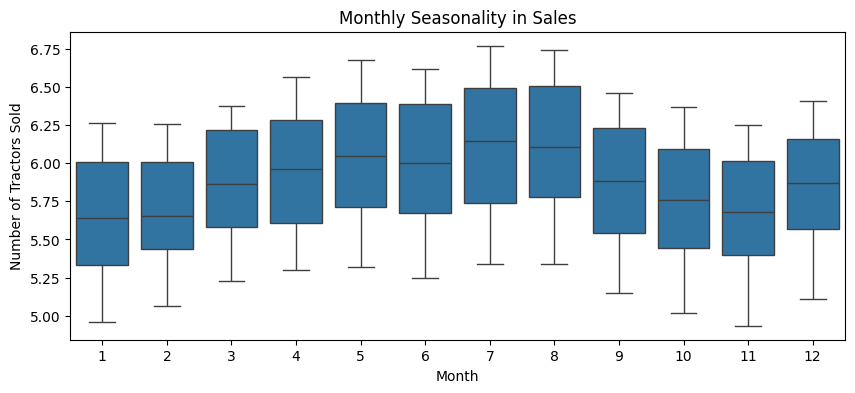

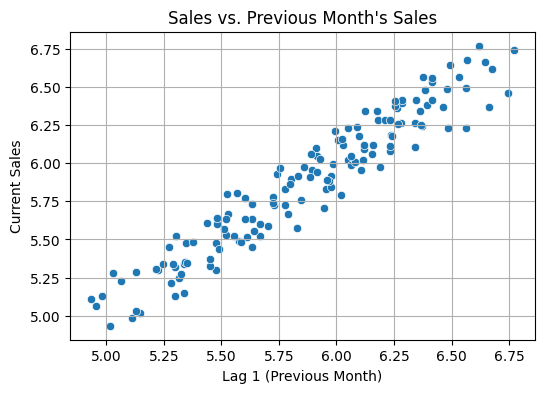

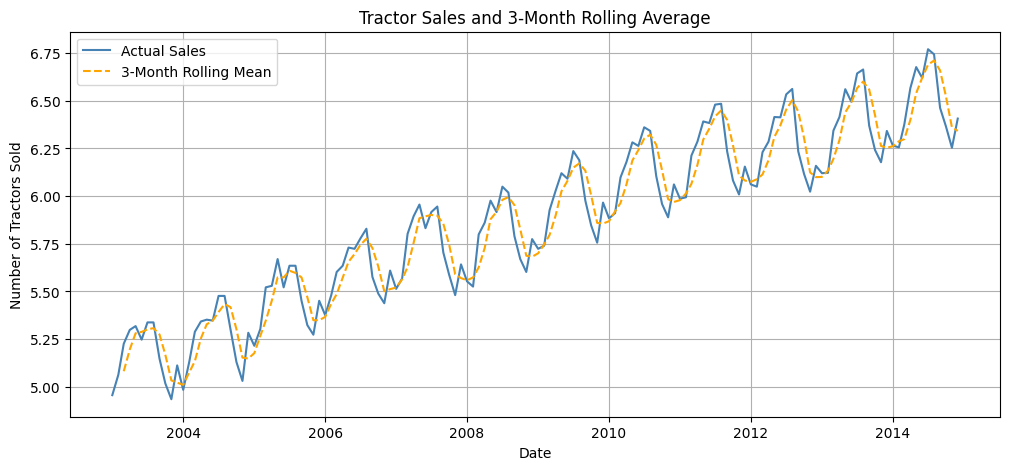

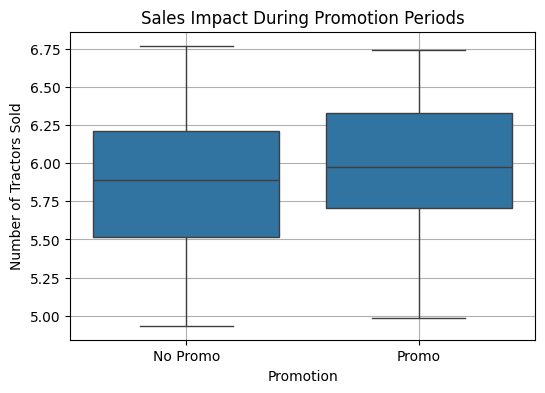

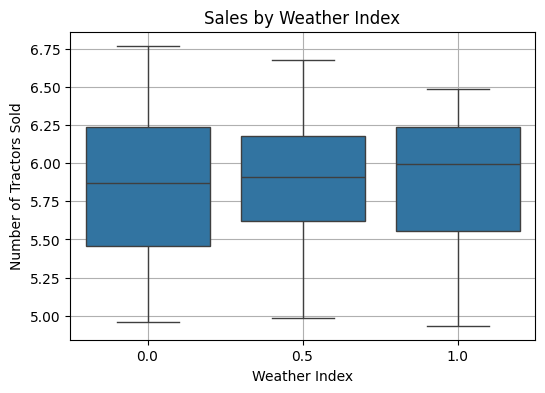

            Tractor_Sales  Year  Month  Quarter  Week  month  quarter  year  \
Date                                                                          
2003-01-01       4.955827  2003      1        1     1      1        1  2003   
2003-02-01       5.062595  2003      2        1     5      2        1  2003   
2003-03-01       5.225747  2003      3        1     9      3        1  2003   
2003-04-01       5.298317  2003      4        2    14      4        2  2003   
2003-05-01       5.318120  2003      5        2    18      5        2  2003   

            is_year_start  is_year_end  ...  lag_9  lag_10  lag_11  lag_12  \
Date                                    ...                                  
2003-01-01              1            0  ...    NaN     NaN     NaN     NaN   
2003-02-01              0            0  ...    NaN     NaN     NaN     NaN   
2003-03-01              0            0  ...    NaN     NaN     NaN     NaN   
2003-04-01              0            0  ...    NaN     N

In [14]:

df_features['month'] = df_features.index.month
df_features['quarter'] = df_features.index.quarter
df_features['year'] = df_features.index.year
df_features['is_year_start'] = df_features.index.is_year_start.astype(int)
df_features['is_year_end'] = df_features.index.is_year_end.astype(int)

# Lag features (1 to 12 months lag)
for lag in range(1, 13):
    df_features[f'lag_{lag}'] = df_features['Tractor_Sales'].shift(lag)

# Rolling features (3-month and 6-month rolling mean and std)
df_features['rolling_mean_3'] = df_features['Tractor_Sales'].rolling(window=3).mean()
df_features['rolling_std_3'] = df_features['Tractor_Sales'].rolling(window=3).std()
df_features['rolling_mean_6'] = df_features['Tractor_Sales'].rolling(window=6).mean()
df_features['rolling_std_6'] = df_features['Tractor_Sales'].rolling(window=6).std()

# Simulated external features (promotion and weather index)
np.random.seed(42)
df_features['promotion'] = np.random.choice([0, 1], size=len(df_features), p=[0.8, 0.2])
df_features['weather_index'] = np.random.choice([0, 0.5, 1], size=len(df_features), p=[0.6, 0.3, 0.1])

# --- Visualization (optional) ---

# Monthly seasonality
plt.figure(figsize=(10, 4))
sns.boxplot(x='month', y='Tractor_Sales', data=df_features)
plt.title("Monthly Seasonality in Sales")
plt.xlabel("Month")
plt.ylabel("Number of Tractors Sold")
plt.show()

# Lag feature (Lag 1)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_features['lag_1'], y=df_features['Tractor_Sales'])
plt.title("Sales vs. Previous Month's Sales")
plt.xlabel("Lag 1 (Previous Month)")
plt.ylabel("Current Sales")
plt.grid(True)
plt.show()

# Rolling Mean Comparison
plt.figure(figsize=(12, 5))
plt.plot(df_features['Tractor_Sales'], label='Actual Sales', color='steelblue')
plt.plot(df_features['rolling_mean_3'], label='3-Month Rolling Mean', linestyle='--', color='orange')
plt.title("Tractor Sales and 3-Month Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Tractors Sold")
plt.legend()
plt.grid(True)
plt.show()


# Promotion impact
plt.figure(figsize=(6, 4))
sns.boxplot(x='promotion', y='Tractor_Sales', data=df_features)
plt.title("Sales Impact During Promotion Periods")
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.xlabel("Promotion")
plt.ylabel("Number of Tractors Sold")
plt.grid(True)
plt.show()

# Weather impact
plt.figure(figsize=(6, 4))
sns.boxplot(x='weather_index', y='Tractor_Sales', data=df_features)
plt.title("Sales by Weather Index")
plt.xlabel("Weather Index")
plt.ylabel("Number of Tractors Sold")
plt.grid(True)
plt.show()

print(df_features.head())

--- Business Insights ---

Monthly boxplots reveal clear seasonality: Sales peak mid-year and drop at the end. -> Insight: Inventory & marketing should align with high-sales months.

Lag plots show high correlation with the previous month. -> Insight: Sales forecasting models can use recent sales to predict near-future trends.

Rolling averages smooth out noise and expose growth trends. -> Insight: Use rolling averages to monitor performance and detect anomalies.

Promotions significantly impact sales, as shown by higher medians during promo months. -> Insight: Track ROI of promotions; focus marketing budget on effective months.

Weather conditions have moderate influence. -> Insight: Integrate weather forecasts to adjust supply chain and marketing.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


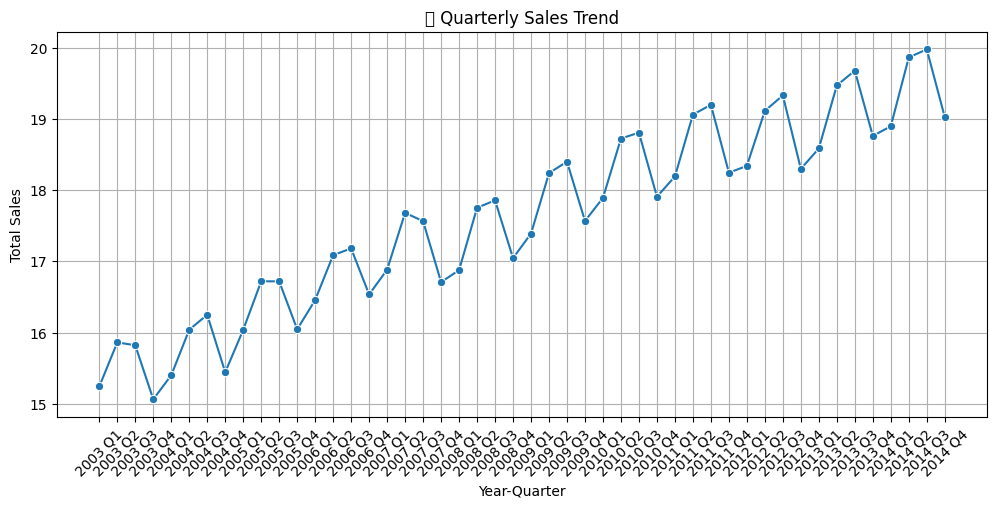

In [15]:
quarterly_sales = df_features.groupby(['year', 'quarter'])['Tractor_Sales'].sum().reset_index()
quarterly_sales['year_quarter'] = quarterly_sales['year'].astype(str) + ' Q' + quarterly_sales['quarter'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(x='year_quarter', y='Tractor_Sales', data=quarterly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("📈 Quarterly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Year-Quarter")
plt.grid(True)
plt.show()


No need for Encoding

# Milestone 3: Machine Learning Model Development and Optimization.



In [16]:
df

,Tractor_Sales,Year,Month,Quarter,Week
Date,,,,,
2003-01-01,4.955827,2003,1,1,1
2003-02-01,5.062595,2003,2,1,5
2003-03-01,5.225747,2003,3,1,9
2003-04-01,5.298317,2003,4,2,14
2003-05-01,5.318120,2003,5,2,18
...,...,...,...,...,...
2014-08-01,6.744059,2014,8,3,31
2014-09-01,6.463029,2014,9,3,36
2014-10-01,6.366470,2014,10,4,40


In [17]:
y = df['Tractor_Sales']  # Target variable
X = df.drop(columns=['Tractor_Sales'])  # Features, dropping the target column




Models for Regrssion

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit, cross_validate

models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('DT', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBR', GradientBoostingRegressor()),
    ('SVR', SVR()),
    ('XGB', XGBRegressor()),
    ('LGBM', LGBMRegressor())
]


PipeLine for All Models

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


# TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)


for name, model in models:
    steps = []
    steps.append(('scaler', RobustScaler()))

    steps.append(('model', model))


    pipeline = Pipeline(steps=steps)


    results = cross_validate(
        pipeline, X, y,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        return_train_score=True,
        n_jobs=-1
    )

    # Print results
    print(f"{name}:")
    print(f"  Train RMSE: {-results['train_score'].mean():.2f}")
    print(f"  Test RMSE:  {-results['test_score'].mean():.2f}")


LR:
  Train RMSE: 0.15
  Test RMSE:  0.56
Ridge:
  Train RMSE: 0.15
  Test RMSE:  0.19
Lasso:
  Train RMSE: 0.28
  Test RMSE:  0.53
ElasticNet:
  Train RMSE: 0.28
  Test RMSE:  0.53
DT:
  Train RMSE: -0.00
  Test RMSE:  0.21
RF:
  Train RMSE: 0.03
  Test RMSE:  0.22
GBR:
  Train RMSE: 0.01
  Test RMSE:  0.21
SVR:
  Train RMSE: 0.07
  Test RMSE:  0.28
XGB:
  Train RMSE: 0.00
  Test RMSE:  0.21
LGBM:
  Train RMSE: 0.11
  Test RMSE:  0.27


From These Models : we can see that Ridge is more balanced without overfitting too much lets take it and do some optimization

In [20]:
from sklearn.model_selection import train_test_split

# Use X and y from your previous step
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # keep time series order
)


fine tuning for Ridge : Alpha Paramater : using Grid Search technique

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 1000]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=100,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model and score
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("Best CV RMSE:", -grid_search.best_score_)

# Predict and evaluate on test data
from sklearn.metrics import mean_squared_error
y_pred = grid_search.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)



Best alpha: 1
Best CV RMSE: 0.13640371958830758
Test RMSE: 0.21607924219654626


Now Lets try Another Solution :ARIMA Model

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets
train = df[:-12]  # Train set: all data except the last 12 rows
test = df[-12:]   # Test set: last 12 rows

# Fit ARIMA model (you may need to try different (p,d,q) values)
model_arima = ARIMA(train['Tractor_Sales'], order=(1,1,1))
model_fit = model_arima.fit()

# Forecast
forecast = model_fit.forecast(steps=12)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Tractor_Sales'], forecast))
print(f'ARIMA Test RMSE: {rmse:.2f}')


ARIMA Test RMSE: 0.22


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Milestone 4: MLOps, Deployment and Monitoring.

In [23]:
import joblib

# Save the model to a file
joblib.dump(grid_search.best_estimator_, 'ridge_model.pkl')


['ridge_model.pkl']

In [24]:
!pip install streamlit
!pip install pyngrok


In [25]:
!pip install --upgrade streamlit

In [31]:
with open('streamlit.py', 'w') as f:
    f.write("""
import streamlit as st
import joblib
import numpy as np

model = joblib.load('/content/ridge_model.pkl')

def main():
    st.title("Sales Prediction")
    st.sidebar.header("Input Features")
    year = st.sidebar.number_input("Year", min_value=2000, max_value=2025, value=2022)
    month = st.sidebar.number_input("Month", min_value=1, max_value=12, value=6)
    quarter = st.sidebar.number_input("Quarter", min_value=1, max_value=4, value=2)
    week = st.sidebar.number_input("Week", min_value=1, max_value=52, value=26)

    input_data = np.array([year, month, quarter, week]).reshape(1, -1)

    if st.button("Predict"):
        prediction = model.predict(input_data)
        st.write(f"Predicted Sales: {prediction[0]:.2f}")

if __name__ == '__main__':
    main()
""")


streamlit -ngrok

In [33]:
from pyngrok import ngrok

# Open a new ngrok tunnel on port 8501 (default for Streamlit)
public_url = ngrok.connect('8501')
print(f"Your Streamlit app is available at: {public_url}")


Your Streamlit app is available at: NgrokTunnel: "https://1791-35-190-159-142.ngrok-free.app" -> "http://localhost:8501"


In [34]:
!ngrok authtoken 2vaDj3RvajVp5SFa2g6xczpOru8_3aV9Vv9fvRK25ZWApMBci

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!streamlit run streamlit.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.190.159.142:8501

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
